### World Energy Production Data

In [60]:
import geopandas as gpd
import pandas as pd

### Production Data

In [65]:
FILENAME1 = 'World Energy Data.csv'
FILENAME2 = 'countries.geojson'

#Find and Format
df_WED = gpd.read_file(FILENAME1)
df_WED.columns = df_WED.iloc[0]

### Choose Year
    Between 1971 and 2019

In [ ]:
year = '2008' 

### Display Data for Given Year in PJ (PetaJoules)
    OEDC Countries Only


In [69]:
#Finds Energy Production Data
df_WED_tot = df_WED.query("NoProduct == '11. Total'")
df_WED_tot_Production = df_WED_tot.query("NoFlow == '01. Production (PJ)'")
prod_year = df_WED_tot_Production.filter(['Country',year], axis=1)

#New DF Index
df_result = prod_year.reset_index(drop=True)

#Removes Non Country Data
df_result.drop(df_result.tail(9).index,inplace=True)

print("Energy Production data per OECD country for the year", year, 'in Peta Joules')
df_result.head(5) # increase to 50 for full table

Energy Production data per OECD country for the year 2008 in Peta Joules


,Country,2008
0,Australia,12008
1,Austria,462
2,Belgium,585
3,Canada,17111
4,Chile,407


### World Map Geometry Cleanup

In [62]:
#Cleanup geodata
gdf = gpd.read_file(FILENAME2)
gdf.columns = ['Country','ISO','geometry']
gdf = gdf.drop(columns = 'ISO')

#Replace Stray Names
gdf = gdf.replace("United States of America", 'United States')
gdf = gdf.replace("China", "People's Republic of China")
gdf = gdf.replace("South Korea", "Korea")
gdf = gdf.replace("Slovakia", "Slovak Republic")
# gdf.head()

### Merge GeoData and Energy Data

In [63]:
#Merge datasets
df_map = df_result.merge(gdf)
gdf = gpd.GeoDataFrame(
    df_map, geometry= 'geometry')
# df_map.head(50)

### Map Plot

<AxesSubplot:>

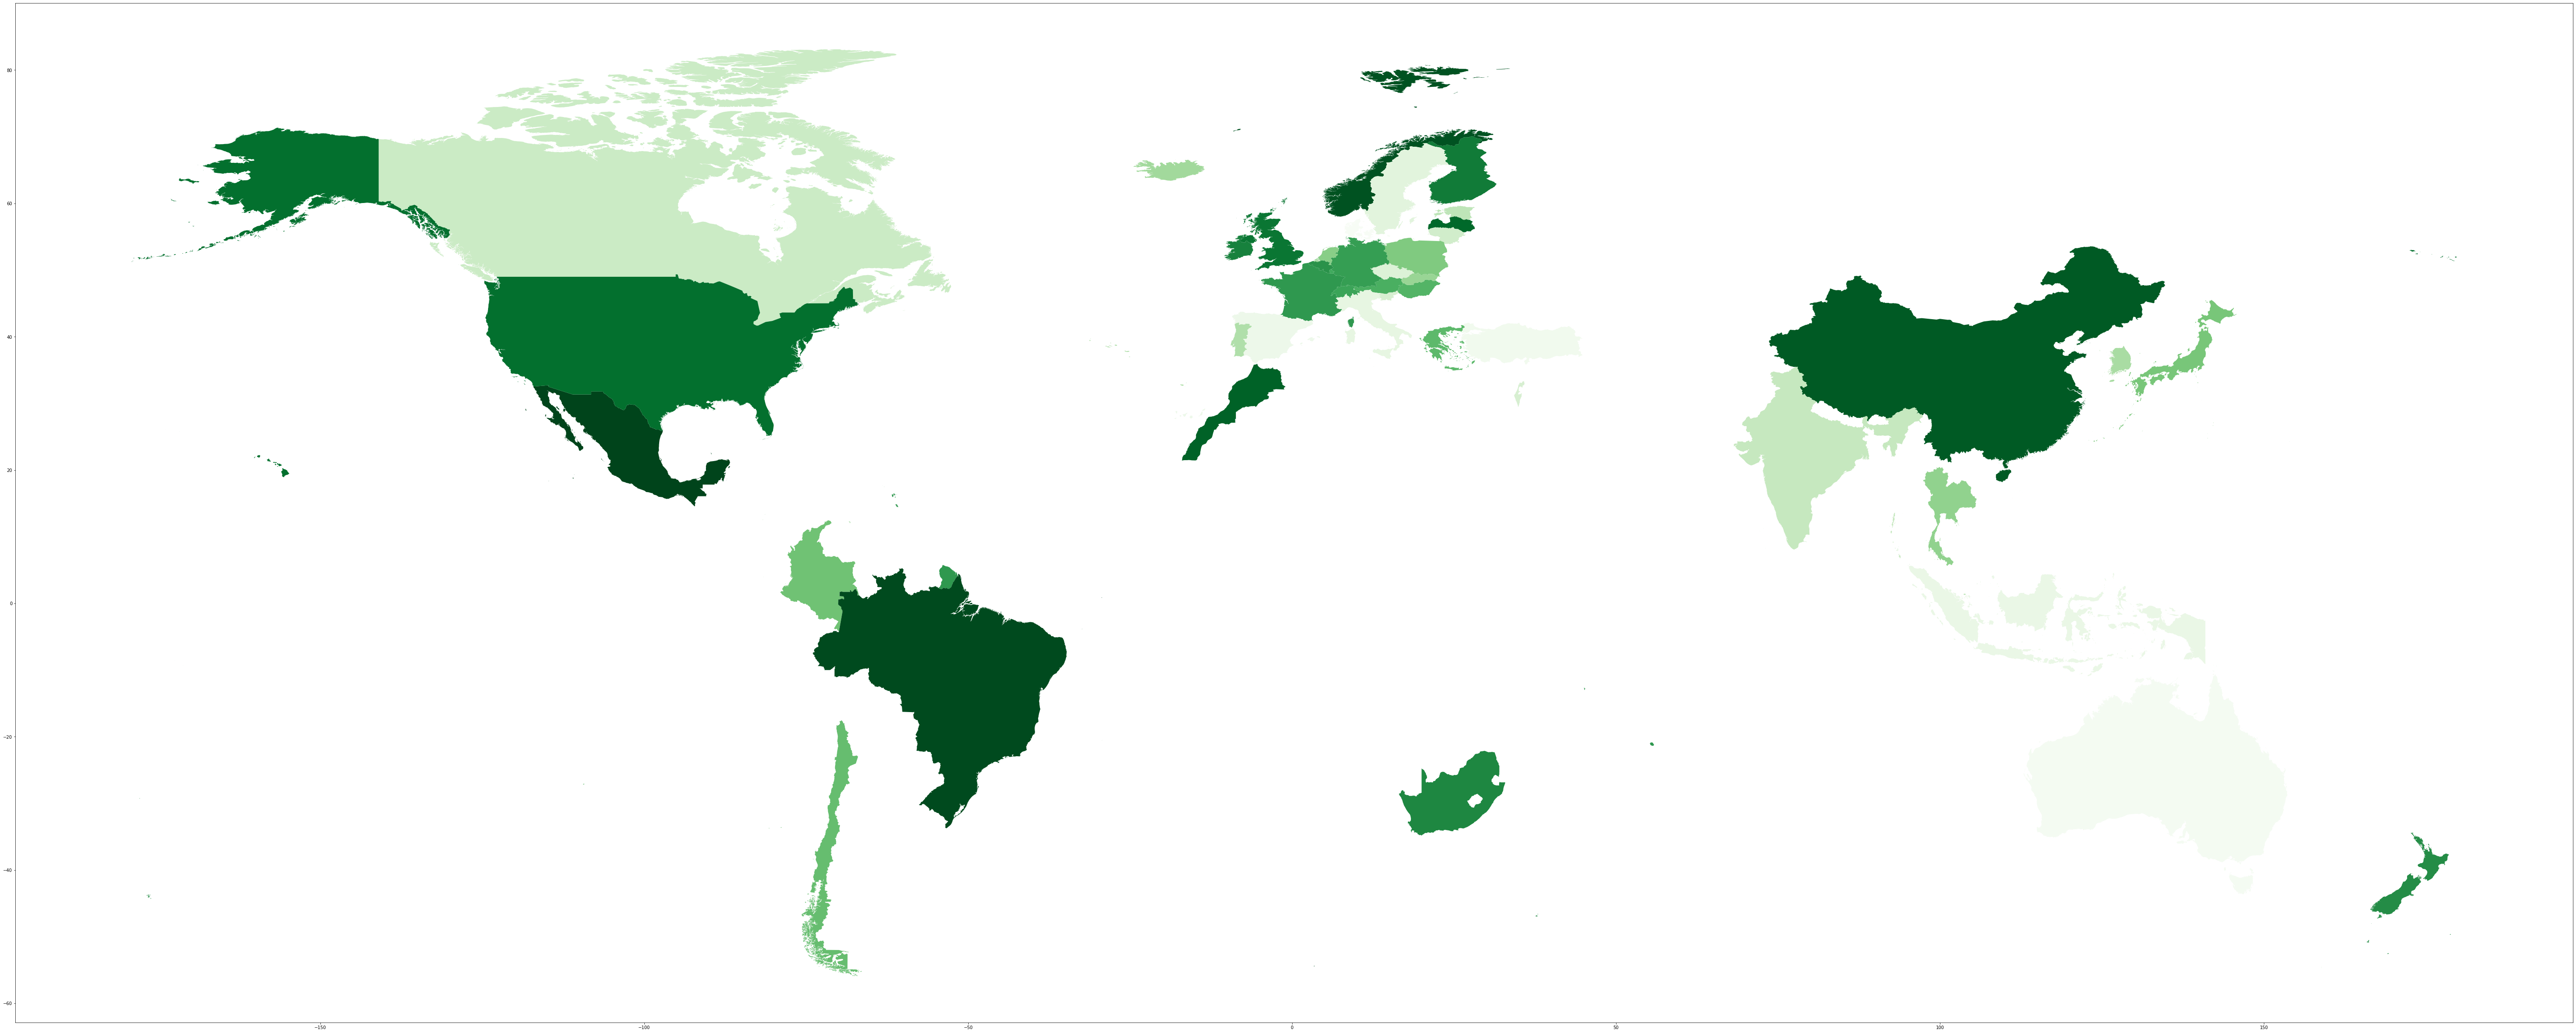

In [64]:
#Plot
# cmap = Greens, cubehelix, winter
gdf.plot(year, cmap= 'Greens' ,figsize=(105,105))

### End of Code